In [1]:
import numpy as np
import pandas as pd
#Importing for  visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
dataFile = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')
dataFile.head()

/home/sobhan/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [2]:
for i in dataFile.columns:
    print(i,end=" ,");

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

In [3]:
print(dataFile['iyear'].value_counts(dropna=False).sort_index())

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: iyear, dtype: int64


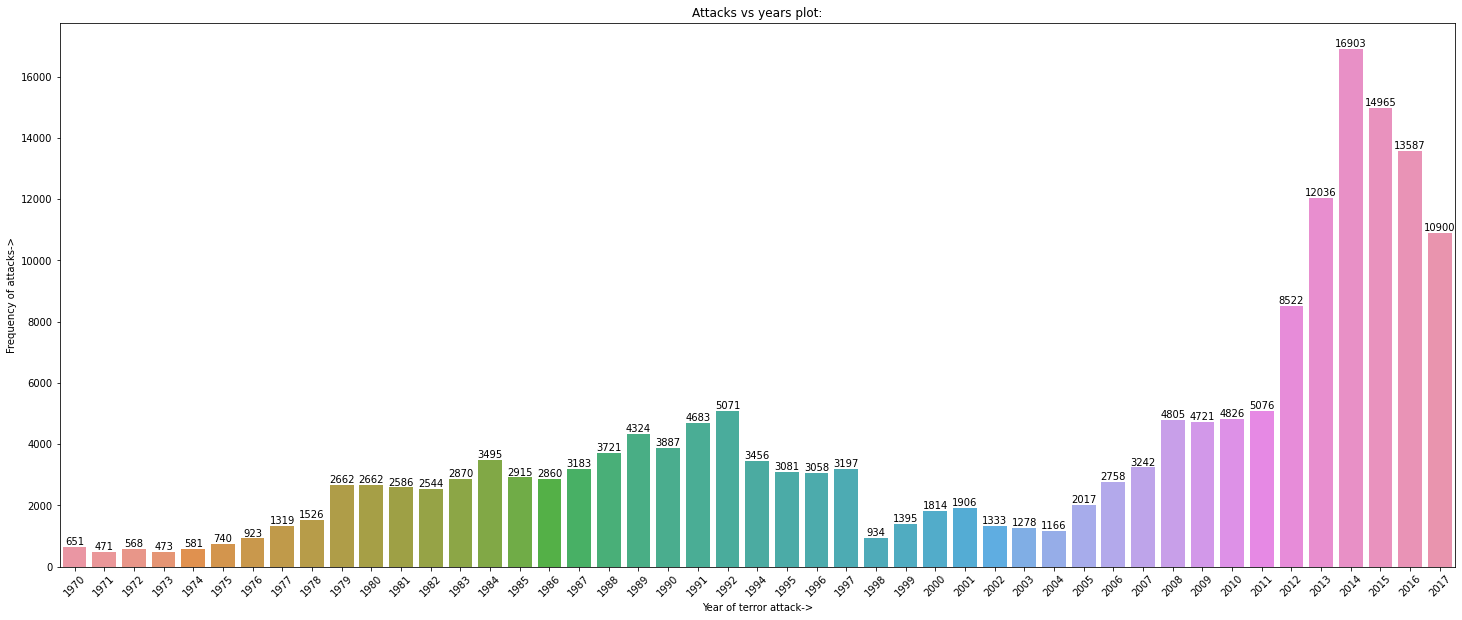

In [4]:
x_axis_year = sorted(dataFile['iyear'].unique())
y_axis_frequency = dataFile['iyear'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (25,10));
ax=sns.barplot(x = x_axis_year,y = y_axis_frequency)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.xlabel("Year of terror attack->")
plt.ylabel("Frequency of attacks->")
plt.title("Attacks vs years plot:")
plt.show()

In [5]:
#pre-processing for top 20 most terror attacks hit nations 
x_axis_country_list = sorted(dataFile['country_txt'].unique())
y_axis_frequency = dataFile['country_txt'].value_counts(dropna = False).sort_index()
country_freq_dict = {}
for i in range(len(x_axis_country_list)):
    country_freq_dict[x_axis_country_list[i]] = y_axis_frequency[i];
country_freq_dict_desc = dict(sorted(country_freq_dict.items(),key=lambda item: item[1],reverse=True))


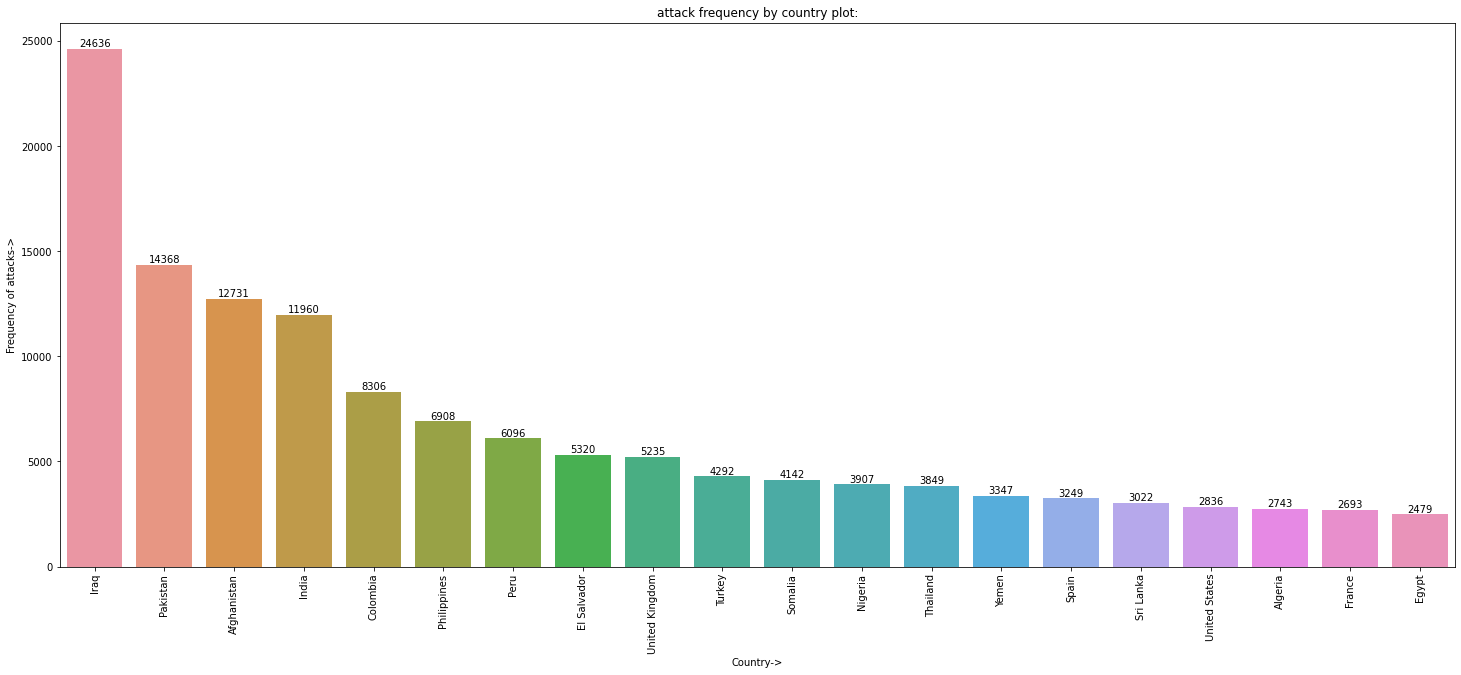

In [6]:
#Top 20 countries that faced highest terror attacks
keys = list(country_freq_dict_desc.keys())
vals = list(country_freq_dict_desc.values())
plt.figure(figsize = (25,10))
ax=sns.barplot(x = keys[:20],y = vals[:20])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.xlabel("Country->")
plt.ylabel("Frequency of attacks->")
plt.title("attack frequency by country plot:")
plt.show()

In [7]:
country_casualties = {}
countries = (dataFile['country_txt'].unique())
for i in countries:
    country_casualties[i] = 0.0
country_casualty_df = dataFile[['country_txt','nkill']]
casualties_dict = country_casualty_df.apply(list).to_dict()
len(casualties_dict['country_txt'])


181691

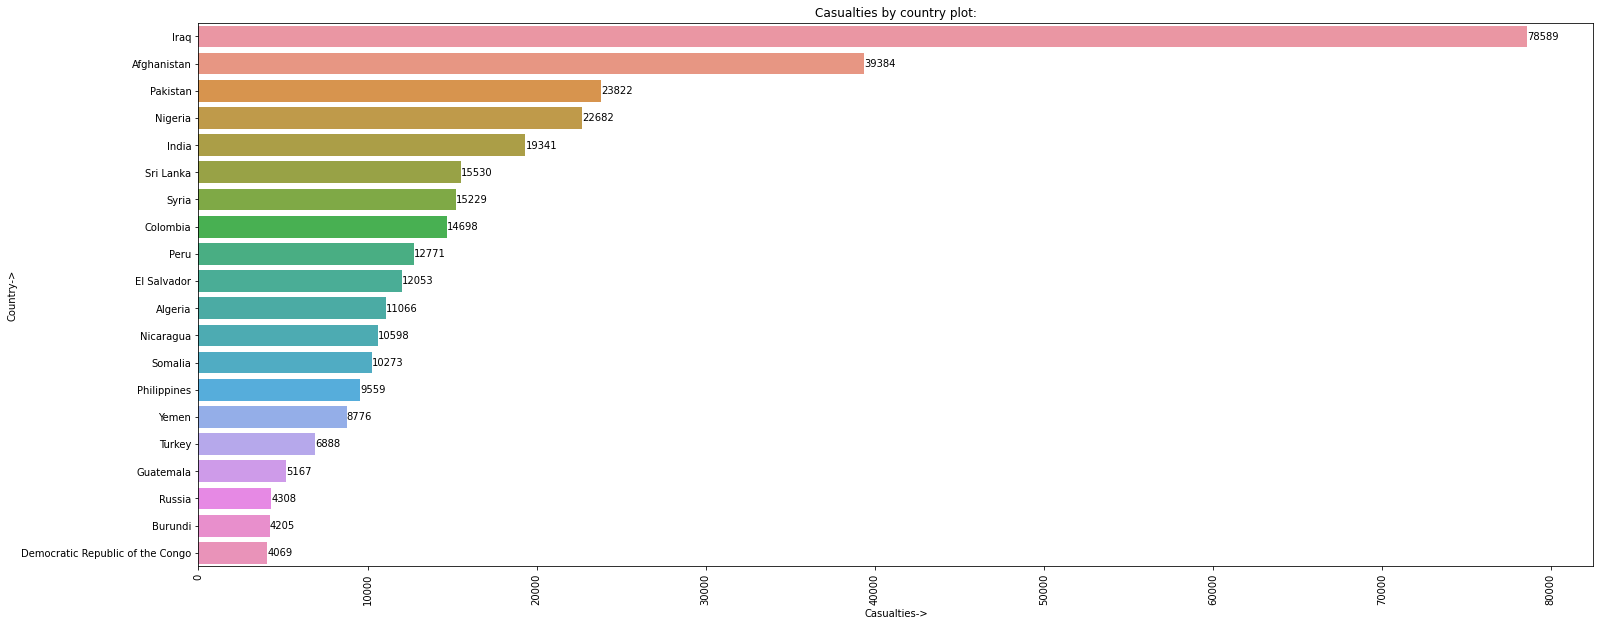

In [8]:
for i in range(len(casualties_dict['country_txt'])):
    if(pd.notnull(casualties_dict['nkill'][i])):
        country_casualties[casualties_dict['country_txt'][i]] += casualties_dict['nkill'][i]
country_casualties = dict(sorted(country_casualties.items(),key=lambda item: item[1],reverse=True))
keys = list(country_casualties.keys())
vals = [float(country_casualties[k]) for k in keys]
plt.figure(figsize = (25,10))
ax=sns.barplot(y = keys[:20],x = vals[:20])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.ylabel("Country->")
plt.xlabel("Casualties->")
plt.title("Casualties by country plot:")
plt.show()

In [9]:
#pre-processing for attack frequency by percentage for regions
region_list = sorted(dataFile['region_txt'].unique())
frequency = dataFile['region_txt'].value_counts(dropna = False).sort_index()
region_freq_dict = {}
for i in range(len(region_list)):
    region_freq_dict[region_list[i]] = frequency[i];
region_freq_dict_desc = dict(sorted(region_freq_dict.items(),key=lambda item: item[1],reverse=True))

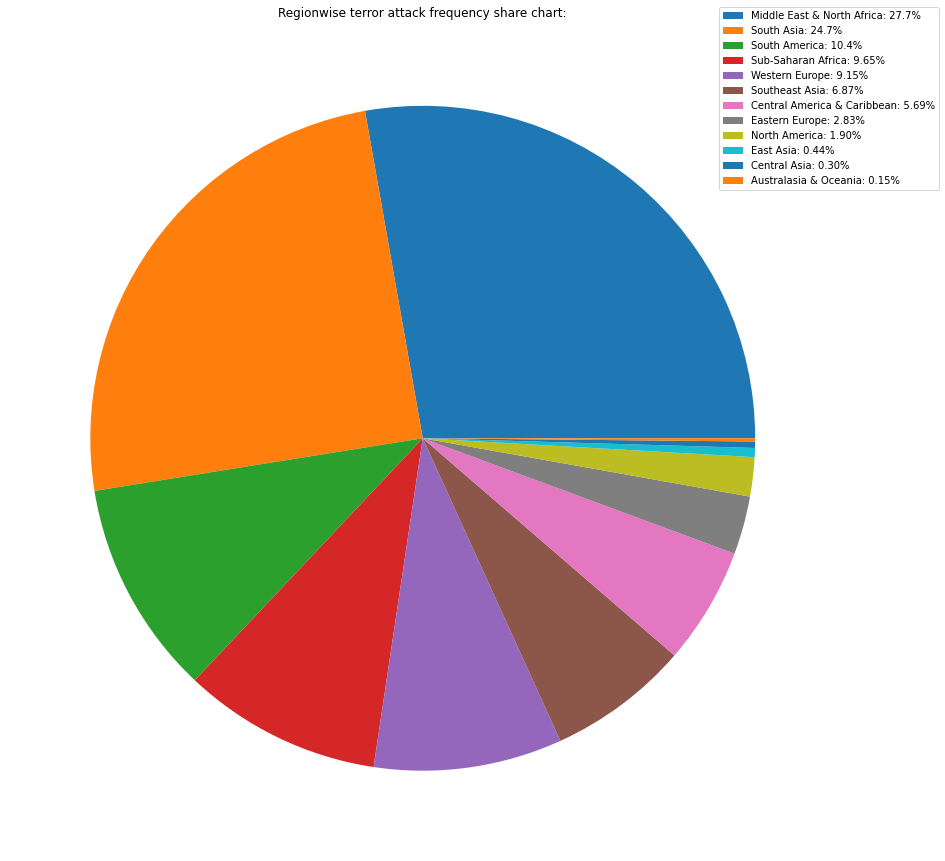

In [10]:
keys = list(region_freq_dict_desc.keys())
vals = list(region_freq_dict_desc.values())
total_attacks = len(dataFile)
percentages = list(str(i*100/total_attacks) for i in vals)
plt.figure(figsize = (25,12))
plt.pie(vals)
labels=[];
for i in range(len(keys)):
    labels.append(keys[i]+': '+percentages[i][:4]+'%')
plt.legend(labels, bbox_to_anchor=(0.85,1.025),loc="upper left")
plt.tight_layout()
plt.title("Regionwise terror attack frequency share chart:")
plt.show()

In [11]:
#To have an understanding of the values involved with the attacktype_text attributes
for i in range(20):
    print(dataFile['attacktype1_txt'][i],end='-')
    print(dataFile['attacktype2_txt'][i],end='-')
    print(dataFile['attacktype3_txt'][i],end=';\n')

Assassination-nan-nan;
Hostage Taking (Kidnapping)-nan-nan;
Assassination-nan-nan;
Bombing/Explosion-nan-nan;
Facility/Infrastructure Attack-nan-nan;
Armed Assault-nan-nan;
Assassination-nan-nan;
Bombing/Explosion-nan-nan;
Facility/Infrastructure Attack-nan-nan;
Facility/Infrastructure Attack-nan-nan;
Bombing/Explosion-nan-nan;
Facility/Infrastructure Attack-nan-nan;
Hijacking-nan-nan;
Facility/Infrastructure Attack-nan-nan;
Facility/Infrastructure Attack-nan-nan;
Bombing/Explosion-nan-nan;
Unknown-nan-nan;
Bombing/Explosion-nan-nan;
Bombing/Explosion-nan-nan;
Facility/Infrastructure Attack-nan-nan;


In [12]:
print(dataFile['attacktype1_txt'].value_counts(dropna=False).sort_index())

Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                                659
Hostage Taking (Barricade Incident)      991
Hostage Taking (Kidnapping)            11158
Unarmed Assault                         1015
Unknown                                 7276
Name: attacktype1_txt, dtype: int64


In [13]:
x_axis_frequency = dataFile['attacktype1_txt'].value_counts(dropna=False).sort_index()
y_axis_attack_type=sorted(dataFile['attacktype1_txt'].unique())
attack_type_freq_dict = {'Attack type':[],'Frequency':[]}
for i in range(0,len(y_axis_attack_type)):
    attack_type_freq_dict['Attack type'].append(y_axis_attack_type[i]); 
    attack_type_freq_dict['Frequency'].append(x_axis_frequency[i]);

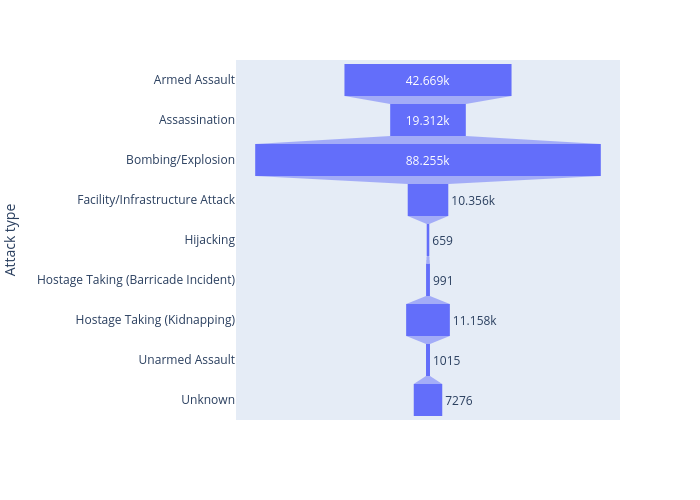

In [14]:
#Funnel chart for the data of attack type
fig = px.funnel(attack_type_freq_dict, y='Attack type', x='Frequency')
fig.show('png')

In [15]:
print(dataFile['targtype1_txt'].value_counts(dropna=False).sort_index())

Abortion Related                    263
Airports & Aircraft                1343
Business                          20669
Educational Institution            4322
Food or Water Supply                317
Government (Diplomatic)            3573
Government (General)              21283
Journalists & Media                2948
Maritime                            351
Military                          27984
NGO                                 970
Other                               137
Police                            24506
Private Citizens & Property       43511
Religious Figures/Institutions     4440
Telecommunication                  1009
Terrorists/Non-State Militia       3039
Tourists                            440
Transportation                     6799
Unknown                            5898
Utilities                          6023
Violent Political Party            1866
Name: targtype1_txt, dtype: int64


In [16]:
print(dataFile['weaptype1_txt'].value_counts(dropna=False).sort_index())

Biological                                                                        35
Chemical                                                                         321
Explosives                                                                     92426
Fake Weapons                                                                      33
Firearms                                                                       58524
Incendiary                                                                     11135
Melee                                                                           3655
Other                                                                            114
Radiological                                                                      14
Sabotage Equipment                                                               141
Unknown                                                                        15157
Vehicle (not to include vehicle-borne explosives, i.e., car or tr

In [17]:
terror_df = dataFile
terror_df.rename(columns={'targtype1_txt':'target','weaptype1_txt':'weapon'},inplace=True)
terror_df = terror_df[['target','weapon']]
terror_df=terror_df.to_dict()

In [18]:
target_weapon_freq = {}
targets = sorted(dataFile['target'].unique())
weapons = sorted(dataFile['weapon'].unique())
for i in weapons:
    target_weapon_freq[i] = {}
    for j in targets:
        target_weapon_freq[i][j]=0
for i in range(0,len(terror_df['target'])):
    target_weapon_freq[terror_df['weapon'][i]][terror_df['target'][i]]+=1

<AxesSubplot:title={'center':'frequency of attcks based on targets stacked with weapons used:'}, ylabel='targets'>

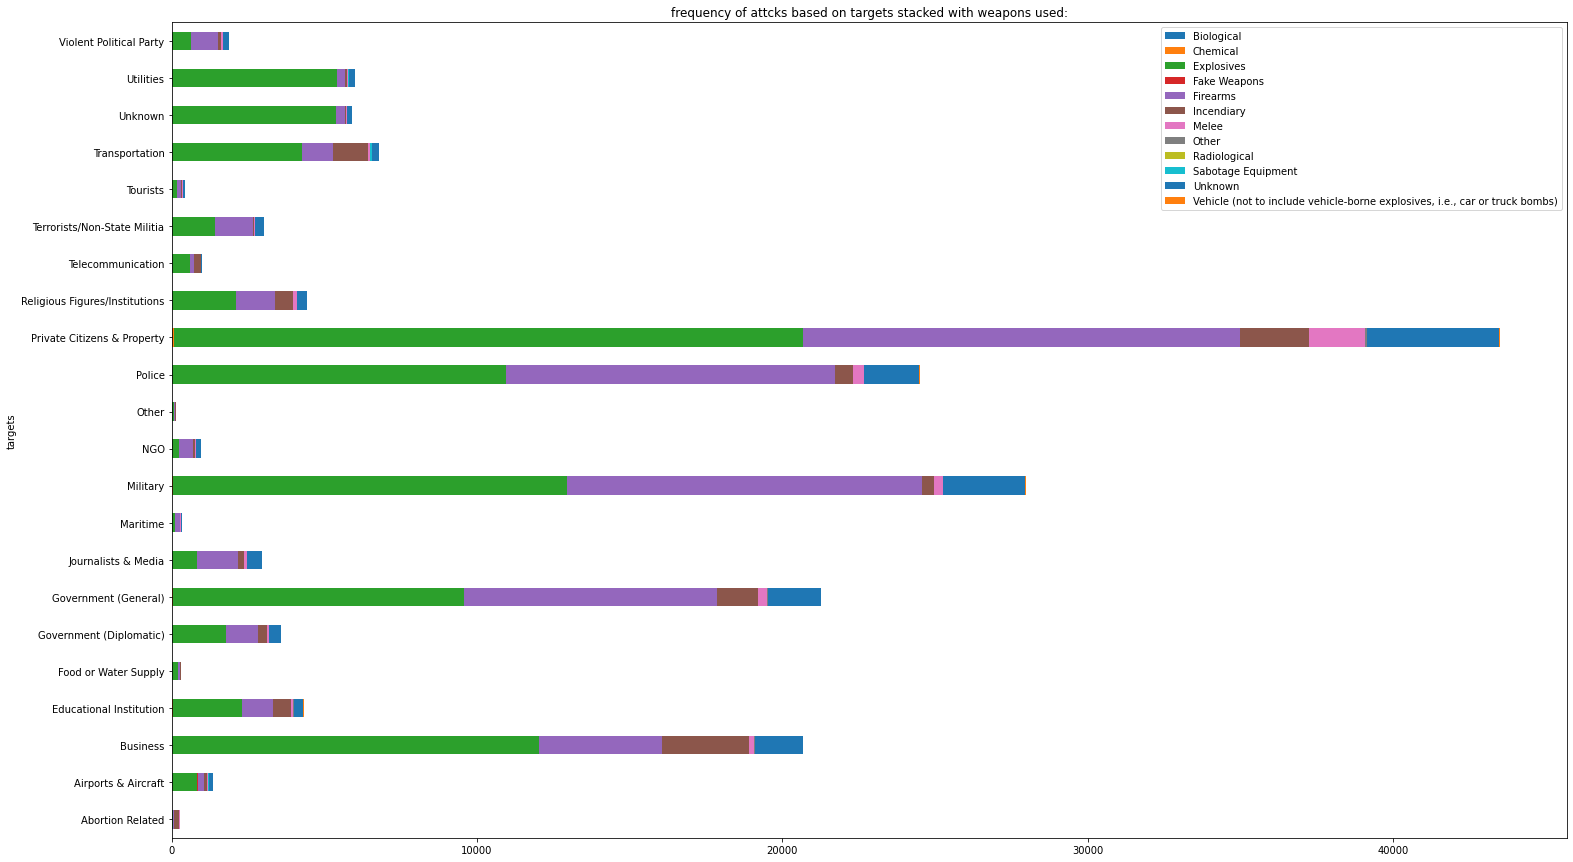

In [19]:
df = pd.DataFrame(target_weapon_freq)
df.plot(kind="barh", stacked=True, figsize=(25,15), title="frequency of attcks based on targets stacked with weapons used:",xlabel="targets",ylabel="frequency of attacks")